In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [2]:
train = pd.read_csv("C:/Users/prati/Documents/drive/fashion-mnist_train.csv")

In [3]:
print(type(train))
x = np.array(train)
print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [4]:
x

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
X = x[:, 1:]
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
#Normalize the data
X = X / 255.0
y = x[:,0]

In [7]:
y

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [8]:
print(f"X.shape : {X.shape}")
print(f"y.shape : {y.shape}")

X.shape : (60000, 784)
y.shape : (60000,)


In [9]:
X_train = X.reshape(-1, 28, 28, 1)

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [21]:
y_train = keras.utils.to_categorical(y)

In [19]:
target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

In [13]:
print(X_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000, 10)


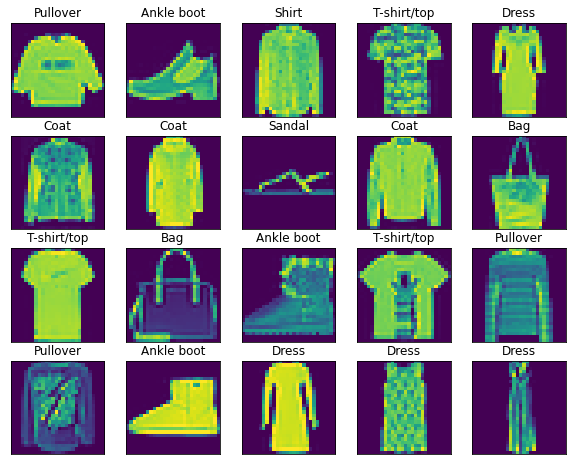

In [20]:
"""for i in range(5):
    plt.figure(i)
    print(y_train[i])
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.show()
"""
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i] )
    plt.title( target_dict[(y[i])])
    plt.xticks([])
    plt.yticks([])

In [22]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(32, (5, 5), activation="relu"))
model.add(keras.layers.Conv2D(32, (5, 5), activation="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          25632     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [24]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs = 20, shuffle = True, batch_size=256, validation_split=0.20)

Epoch 1/20
188/188 [==============================] - 39s 208ms/step - loss: 0.1422 - accuracy: 0.9479 - val_loss: 0.2379 - val_accuracy: 0.9211
Epoch 2/20
188/188 [==============================] - 42s 221ms/step - loss: 0.1380 - accuracy: 0.9485 - val_loss: 0.2427 - val_accuracy: 0.9216
Epoch 3/20
188/188 [==============================] - 41s 220ms/step - loss: 0.1289 - accuracy: 0.9517 - val_loss: 0.2420 - val_accuracy: 0.9222
Epoch 4/20
188/188 [==============================] - 43s 227ms/step - loss: 0.1247 - accuracy: 0.9539 - val_loss: 0.2659 - val_accuracy: 0.9215
Epoch 5/20
188/188 [==============================] - 40s 213ms/step - loss: 0.1262 - accuracy: 0.9535 - val_loss: 0.2812 - val_accuracy: 0.9115
Epoch 6/20
188/188 [==============================] - 33s 176ms/step - loss: 0.1163 - accuracy: 0.9572 - val_loss: 0.2581 - val_accuracy: 0.9208
Epoch 7/20
188/188 [==============================] - 33s 177ms/step - loss: 0.1089 - accuracy: 0.9594 - val_loss: 0.2490 - val_ac

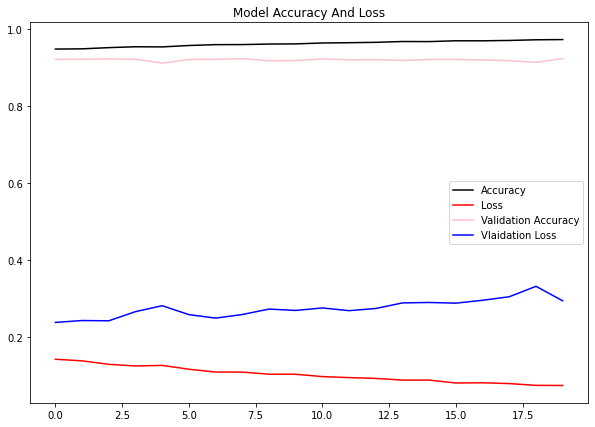

In [31]:
plt.figure(figsize=(10, 7))
acc = history.history["accuracy"]
loss = history.history["loss"]

epochs = range(len(acc))
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]


plt.plot(epochs, acc, "k", label="Accuracy")
plt.plot(epochs, loss, "r", label="Loss")

plt.plot(epochs, val_acc, "pink", label="Validation Accuracy")
plt.plot(epochs, val_loss, "blue", label="Vlaidation Loss")
plt.title("Model Accuracy And Loss")
plt.legend()
plt.show()